# SQL operations using SQLite3

In [1]:
# Import libraries:
import sqlite3
import pandas as pd

# Establish connection to the database
conn = sqlite3.connect("chinook.db")

### Database schema:

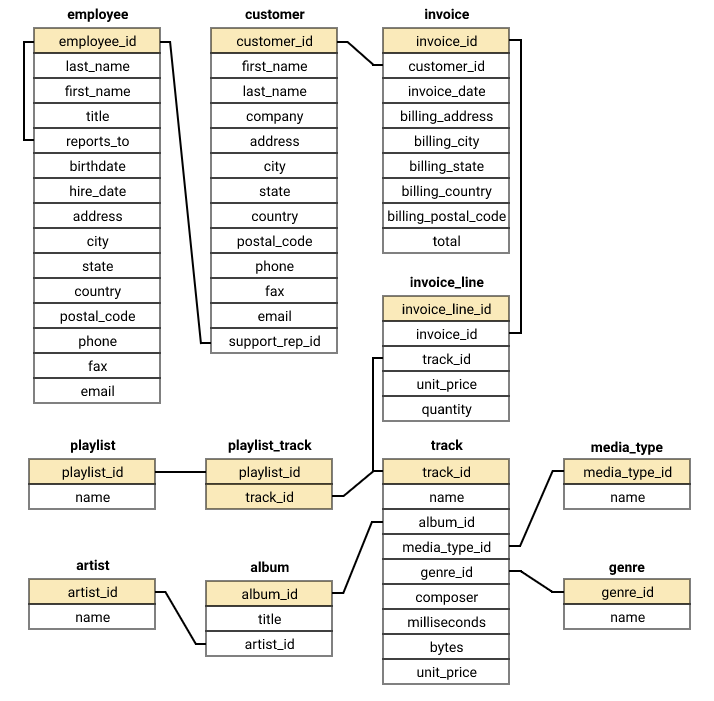

### Obtain a list of tables in the database:

In [2]:
q = "SELECT * from sqlite_master WHERE type ='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,album,album,2,CREATE TABLE [album]\n(\n [album_id] INTEGE...
1,table,artist,artist,3,CREATE TABLE [artist]\n(\n [artist_id] INTE...
2,table,customer,customer,4,CREATE TABLE [customer]\n(\n [customer_id] ...
3,table,employee,employee,5,CREATE TABLE [employee]\n(\n [employee_id] ...
4,table,genre,genre,6,CREATE TABLE [genre]\n(\n [genre_id] INTEGE...
5,table,invoice,invoice,7,CREATE TABLE [invoice]\n(\n [invoice_id] IN...
6,table,invoice_line,invoice_line,8,CREATE TABLE [invoice_line]\n(\n [invoice_l...
7,table,media_type,media_type,9,CREATE TABLE [media_type]\n(\n [media_type_...
8,table,playlist,playlist,10,CREATE TABLE [playlist]\n(\n [playlist_id] ...
9,table,playlist_track,playlist_track,11,CREATE TABLE [playlist_track]\n(\n [playlis...


# SQL Inner Join

Syntax:

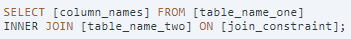

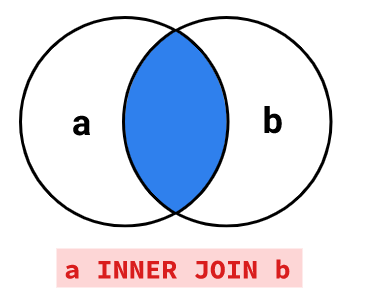

In [3]:
q="SELECT * FROM genre INNER JOIN track ON genre.genre_id = track.genre_id LIMIT 3"
pd.read_sql_query(q, conn)

,genre_id,name,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,1,Rock,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,1,Rock,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99


In [4]:
# Performing the same command with aliases for easier syntax:
q="SELECT * FROM genre as g INNER JOIN track as t ON g.genre_id = t.genre_id LIMIT 3"
pd.read_sql_query(q, conn)

,genre_id,name,track_id,name,album_id,media_type_id,genre_id,composer,milliseconds,bytes,unit_price
0,1,Rock,1,For Those About To Rock (We Salute You),1,1,1,"Angus Young, Malcolm Young, Brian Johnson",343719,11170334,0.99
1,1,Rock,2,Balls to the Wall,2,2,1,None,342562,5510424,0.99
2,1,Rock,3,Fast As a Shark,3,2,1,"F. Baltes, S. Kaufman, U. Dirkscneider & W. Ho...",230619,3990994,0.99


In [5]:
# Selecting specific columns while doing join:
q="SELECT e.state, c.email  FROM employee e INNER JOIN customer c ON e.employee_id = c.support_rep_id WHERE c.city='Warsaw'"

In [6]:
pd.read_sql_query(q, conn)

,state,email
0,AB,stanisław.wójcik@wp.pl


In [7]:
# Finding unique values
q="SELECT COUNT(DISTINCT(support_rep_id)) FROM customer;"
pd.read_sql_query(q, conn)

,COUNT(DISTINCT(support_rep_id))
0,3


In [8]:
q="SELECT COUNT(DISTINCT(employee_id)) FROM employee;"
pd.read_sql_query(q, conn)

,COUNT(DISTINCT(employee_id))
0,8


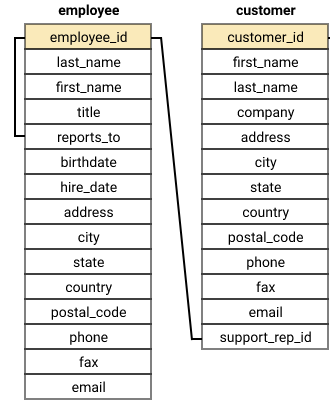

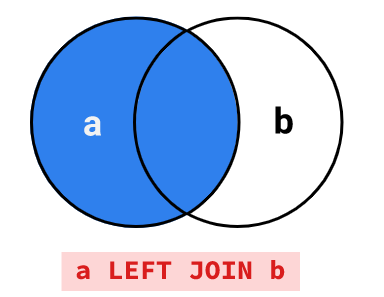

There are more employee_ids in the employee table then support_rep_ids in the customer table. This means that not every employee is also a support representative. Using left join find out what employees are not:

In [9]:
# Performing the same command with aliases for easier syntax:
q="SELECT DISTINCT(e.first_name) FROM employee e LEFT JOIN customer c ON e.employee_id = c.support_rep_id WHERE c.support_rep_id IS NULL"
print("Non-customer facing employees:")
pd.read_sql_query(q, conn).values.tolist()

Non-customer facing employees:


[['Andrew'], ['Nancy'], ['Michael'], ['Robert'], ['Laura']]

In [10]:
q="SELECT DISTINCT(e.first_name) FROM employee e LEFT JOIN customer c ON e.employee_id = c.support_rep_id WHERE c.support_rep_id IS NOT NULL"
print("Customer facing employees:")
pd.read_sql_query(q, conn).values.tolist()

Customer facing employees:


[['Jane'], ['Margaret'], ['Steve']]

# ORDER BY and GROUP BY:

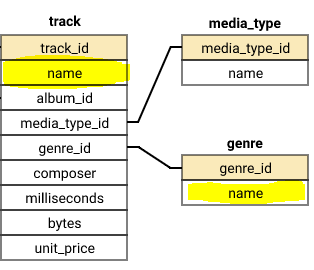

Assume that we want to like see what genre has the widest selection

In [11]:
q="SELECT g.name as Genre, COUNT(t.name) as Count FROM track t INNER JOIN genre g ON t.genre_id = g.genre_id  GROUP BY g.name ORDER BY COUNT(t.name) DESC LIMIT 10"
pd.read_sql_query(q, conn)

,Genre,Count
0,Rock,1297
1,Latin,579
2,Metal,374
3,Alternative & Punk,332
4,Jazz,130
5,TV Shows,93
6,Blues,81
7,Classical,74
8,Drama,64
9,R&B/Soul,61


### Using a join and a subquery:

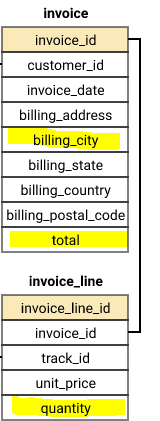

In [12]:
q="SELECT i.billing_city City, sum(i.total) Total, sum(l.quantity) Quantity FROM invoice i INNER JOIN (SELECT * FROM invoice_line WHERE unit_price=0.99) l ON i.invoice_id = l.invoice_id GROUP BY city LIMIT 4"
pd.read_sql_query(q, conn)

,City,Total,Quantity
0,Amsterdam,544.50,66
1,Bangalore,669.24,72
2,Berlin,1556.28,160
3,Bordeaux,1248.39,101


### Joining more than two tables:

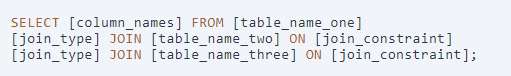

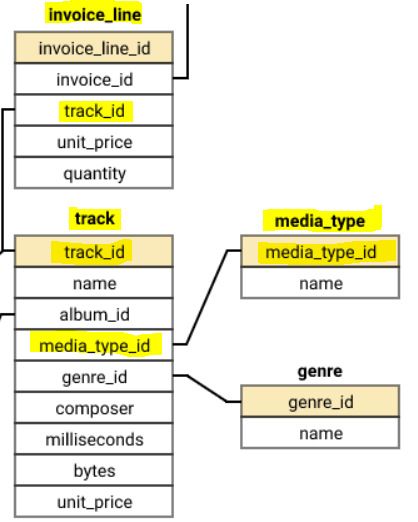

In [13]:
q="SELECT il.invoice_id,  t.composer, mt.name FROM invoice_line il INNER JOIN track t ON t.track_id = il.track_id INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id LIMIT 3"
pd.read_sql_query(q, conn)
print(q)

SELECT il.invoice_id,  t.composer, mt.name FROM invoice_line il INNER JOIN track t ON t.track_id = il.track_id INNER JOIN media_type mt ON mt.media_type_id = t.media_type_id LIMIT 3


# Combining two columns into one:

In [14]:
q = "SELECT e.first_name || ' '|| last_name employee_name FROM employee e"
pd.read_sql_query(q, conn)

,employee_name
0,Andrew Adams
1,Nancy Edwards
2,Jane Peacock
3,Margaret Park
4,Steve Johnson
5,Michael Mitchell
6,Robert King
7,Laura Callahan


# Matching a part of a string

In [15]:
q = "SELECT e.first_name || ' '|| last_name employee_name FROM employee e WHERE employee_name LIKE '%jo%'"
pd.read_sql_query(q, conn)

,employee_name
0,Steve Johnson


# Adding categorization to the query

In [16]:
q = "SELECT name, bytes, CASE WHEN bytes<10000000 THEN 'Small' ELSE 'Big' END AS Size FROM track LIMIT 4"
pd.read_sql_query(q, conn)


,name,bytes,Size
0,For Those About To Rock (We Salute You),11170334,Big
1,Balls to the Wall,5510424,Small
2,Fast As a Shark,3990994,Small
3,Restless and Wild,4331779,Small


# WITH CLAUSE
### WITH clause to create a temporary subquery (can be only use with the current query)

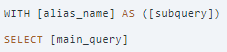

WITH playlist_info AS 

(SELECT p.name playlist_name, pt.playlist_id, t.name track_name, t.milliseconds/1000 length_seconds 
FROM playlist p INNER JOIN playlist_track pt ON p.playlist_id = pt.playlist_id 
INNER JOIN track t ON pt.track_id = t.track_id ) 


SELECT playlist_id, playlist_name, COUNT(track_name) number_of_tracks, SUM(length_seconds) length_seconds  

FROM playlist_info GROUP BY 1,2 ORDER BY 1

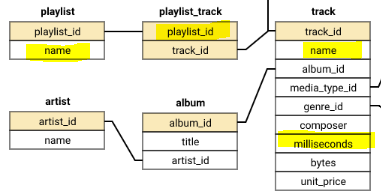

In [17]:
q="WITH playlist_info AS (SELECT p.name playlist_name, pt.playlist_id, t.name track_name, t.milliseconds/1000 length_seconds FROM playlist p INNER JOIN playlist_track pt ON p.playlist_id = pt.playlist_id INNER JOIN track t ON pt.track_id = t.track_id ) SELECT playlist_id, playlist_name, COUNT(track_name) number_of_tracks, SUM(length_seconds) length_seconds  FROM playlist_info GROUP BY 1,2 ORDER BY 1;" 
pd.read_sql_query(q, conn)

,playlist_id,playlist_name,number_of_tracks,length_seconds
0,1,Music,3290,876049
1,3,TV Shows,213,500987
2,5,90’s Music,1477,397970
3,8,Music,3290,876049
4,9,Music Videos,1,294
5,10,TV Shows,213,500987
6,11,Brazilian Music,39,9464
7,12,Classical,75,21736
8,13,Classical 101 - Deep Cuts,25,6742
9,14,Classical 101 - Next Steps,25,7565


# VIEW CLAUSE
### VIEW allows to make the WITH temporary query permanent for use in future queries

To create a view:
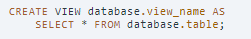

In Jupyter database name does not need to be specified:
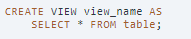

To redefine the view it needs to be dropped first:


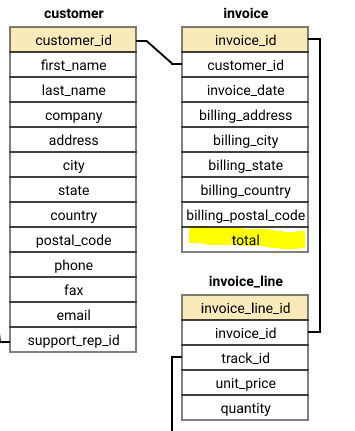

In [19]:
#Commit the view
c = conn.cursor()
c.execute("CREATE VIEW custom_90 AS SELECT c.* FROM customer c INNER JOIN invoice i ON i.customer_id=c.customer_id GROUP BY 1 HAVING SUM(i.total)>90;")

In [20]:
#call the view
q="SELECT * FROM custom_90"
pd.read_sql_query(q, conn).head(3)

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
2,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


### Alternative way of running querries:

- How to install the extension:
- https://www.datacamp.com/community/tutorials/sql-interface-within-jupyterlab
- How to use the extension:
- https://github.com/royalosyin/Practice-SQL-with-SQLite-and-Jupyter-Notebook/blob/master/ex01-Quick%20Start.ipynb

In [3]:
%load_ext sql

In [4]:
%sql sqlite:///chinook.db

'Connected: @chinook.db'

In [24]:
%%sql 
CREATE VIEW axaxxx AS 
    SELECT
        c.*
    FROM invoice i
    INNER JOIN customer c ON i.customer_id = c.customer_id
    GROUP BY 1
    HAVING SUM(i.total) > 90;
SELECT * FROM axaxxx;

 * sqlite:///chinook.db
Done.
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4
21,Kathy,Chase,None,801 W 4th Street,Reno,NV,USA,89503,+1 (775) 223-7665,None,kachase@hotmail.com,5
22,Heather,Leacock,None,120 S Orange Ave,Orlando,FL,USA,32801,+1 (407) 999-7788,None,hleacock@gmail.com,4
30,Edward,Francis,None,230 Elgin Street,Ottawa,ON,Canada,K2P 1L7,+1 (613) 234-3322,None,edfrancis@yachoo.ca,3


# UNION
### To join tables with the same columns 

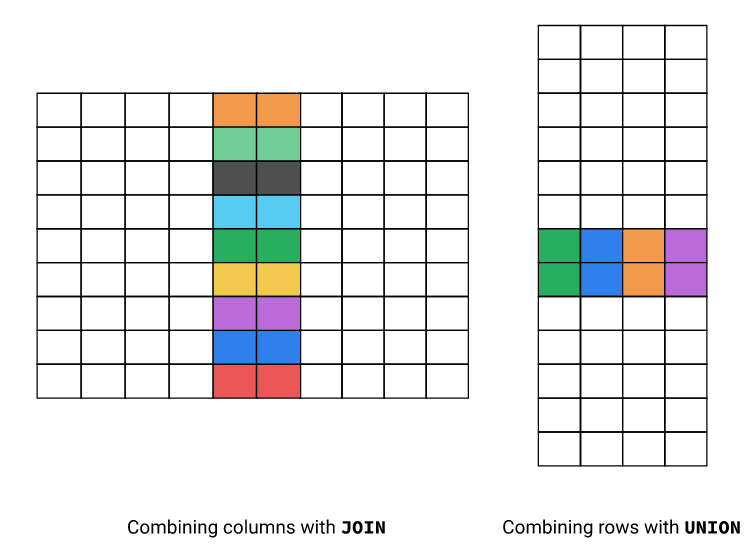

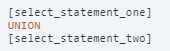

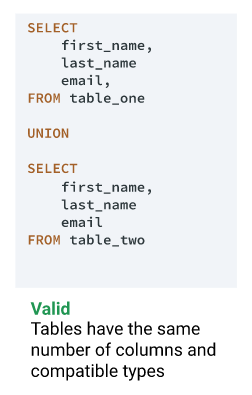

In [42]:
### Create a second view for UNION join

In [40]:
#Commit the view
c = conn.cursor()
c.execute("CREATE VIEW customer_usa2 AS SELECT c.* FROM customer c INNER JOIN invoice i ON i.customer_id=c.customer_id WHERE c.country='USA';")

In [41]:
#call the view
q="SELECT * FROM customer_usa2"
pd.read_sql_query(q, conn).head(3)

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
1,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
2,16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4


In [43]:
#call the union
%%sql
SELECT *
FROM custom_90

UNION

SELECT *
FROM customer_usa2

 * sqlite:///chinook.db
Done.


customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4
6,Helena,Holý,None,Rilská 3174/6,Prague,None,Czech Republic,14300,+420 2 4177 0449,None,hholy@gmail.com,5
13,Fernanda,Ramos,None,Qe 7 Bloco G,Brasília,DF,Brazil,71020-677,+55 (61) 3363-5547,+55 (61) 3363-7855,fernadaramos4@uol.com.br,4
16,Frank,Harris,Google Inc.,1600 Amphitheatre Parkway,Mountain View,CA,USA,94043-1351,+1 (650) 253-0000,+1 (650) 253-0000,fharris@google.com,4
17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
18,Michelle,Brooks,None,627 Broadway,New York,NY,USA,10012-2612,+1 (212) 221-3546,+1 (212) 221-4679,michelleb@aol.com,3
19,Tim,Goyer,Apple Inc.,1 Infinite Loop,Cupertino,CA,USA,95014,+1 (408) 996-1010,+1 (408) 996-1011,tgoyer@apple.com,3
20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4


# Combining tables along rows: UNION, INTERSECT, EXCEPT:
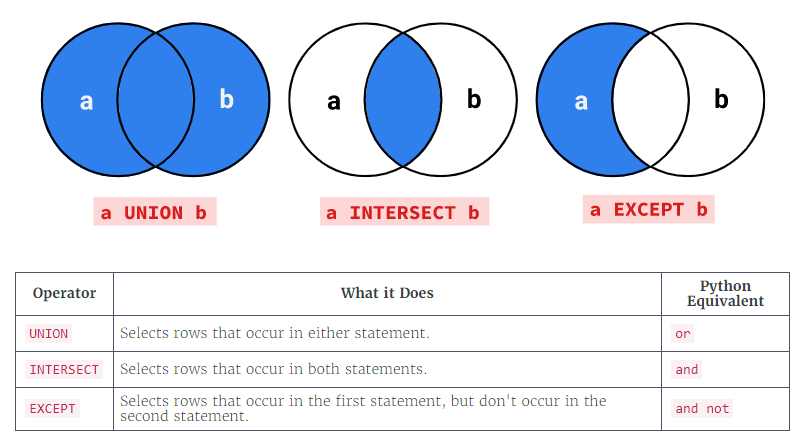

In [44]:
#intersect example
q="SELECT * FROM custom_90 INTERSECT SELECT * FROM customer_usa2" 
pd.read_sql_query(q, conn).head(3)

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,17,Jack,Smith,Microsoft Corporation,1 Microsoft Way,Redmond,WA,USA,98052-8300,+1 (425) 882-8080,+1 (425) 882-8081,jacksmith@microsoft.com,5
1,20,Dan,Miller,None,541 Del Medio Avenue,Mountain View,CA,USA,94040-111,+1 (650) 644-3358,None,dmiller@comcast.com,4
2,21,Kathy,Chase,None,801 W 4th Street,Reno,NV,USA,89503,+1 (775) 223-7665,None,kachase@hotmail.com,5


In [45]:
#intersect example
q="SELECT * FROM custom_90 EXCEPT SELECT * FROM customer_usa2" 
pd.read_sql_query(q, conn).head(3)

,customer_id,first_name,last_name,company,address,city,state,country,postal_code,phone,fax,email,support_rep_id
0,1,Luís,Gonçalves,Embraer - Empresa Brasileira de Aeronáutica S.A.,"Av. Brigadeiro Faria Lima, 2170",São José dos Campos,SP,Brazil,12227-000,+55 (12) 3923-5555,+55 (12) 3923-5566,luisg@embraer.com.br,3
1,3,François,Tremblay,None,1498 rue Bélanger,Montréal,QC,Canada,H2G 1A7,+1 (514) 721-4711,None,ftremblay@gmail.com,3
2,5,František,Wichterlová,JetBrains s.r.o.,Klanova 9/506,Prague,None,Czech Republic,14700,+420 2 4172 5555,+420 2 4172 5555,frantisekw@jetbrains.com,4


# Use of WITH to define one or more subqueries
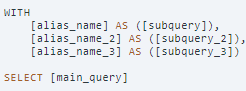

In [73]:
%%sql

WITH
cust_india AS (SELECT * FROM customer WHERE country="India"),
cust_sum AS (SELECT  customer_id, sum(total) total FROM invoice GROUP BY customer_id)

SELECT

ci.first_name || ' '|| ci.last_name customer_name, cs.total

FROM cust_india ci

LEFT JOIN cust_sum cs ON cs.customer_id=ci.customer_id



 * sqlite:///chinook.db
Done.


customer_name,total
Manoj Pareek,111.86999999999999
Puja Srivastava,71.28


### Exercise: write a query to find the customer from each country that has spent the most money at the store

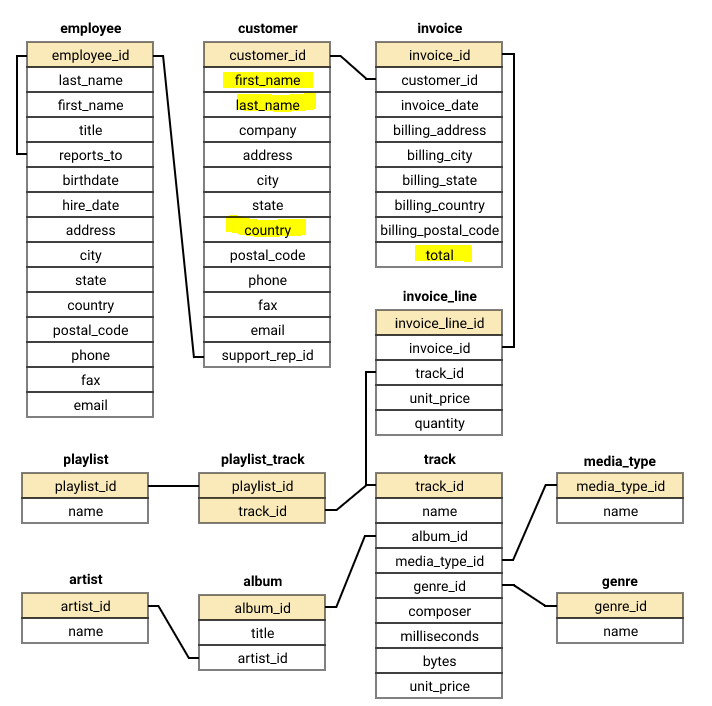

In [50]:
%%sql
WITH
    customer_country_purchases AS
        (
         SELECT
             i.customer_id,
             c.country,
             SUM(i.total) total_purchases
         FROM invoice i
         INNER JOIN customer c ON i.customer_id = c.customer_id
         GROUP BY 1, 2
        ),
    country_max_purchase AS
        (
         SELECT
             country,
             MAX(total_purchases) max_purchase
         FROM customer_country_purchases
         GROUP BY 1
        ),
    country_best_customer AS
        (
         SELECT
            cmp.country,
            cmp.max_purchase,
            (
             SELECT ccp.customer_id
             FROM customer_country_purchases ccp
             WHERE ccp.country = cmp.country AND cmp.max_purchase = ccp.total_purchases
            ) customer_id
         FROM country_max_purchase cmp
        )
SELECT
    cbc.country country,
    c.first_name || " " || c.last_name customer_name,
    cbc.max_purchase total_purchased
FROM customer c
INNER JOIN country_best_customer cbc ON cbc.customer_id = c.customer_id
ORDER BY 1 ASC

 * sqlite:///chinook.db
Done.


country,customer_name,total_purchased
Argentina,Diego Gutiérrez,39.6
Australia,Mark Taylor,81.18
Austria,Astrid Gruber,69.3
Belgium,Daan Peeters,60.38999999999999
Brazil,Luís Gonçalves,108.89999999999998
Canada,François Tremblay,99.99
Chile,Luis Rojas,97.02000000000001
Czech Republic,František Wichterlová,144.54000000000002
Denmark,Kara Nielsen,37.61999999999999
Finland,Terhi Hämäläinen,79.2


In [ ]:
c.first_name || ' '|| c.last_name customer_name, sum(i.total) total_purchased
FROM customer c